In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../../input/data/train/train_ratings.csv') # 전체 학습 데이터 # git repo기준
train_df.head(3)

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539


# 영화를 본 개월 수

In [3]:
train_users = train_df['user'].unique()
time_period_df=train_df.copy()
year=list()
month=list()
day=list()
for t in time_period_df['time']:
    y,m,d= map(int,time.strftime('%Y-%m-%d', time.localtime(t)).split('-'))
    year.append(y)
    month.append(m)
    day.append(d)

In [4]:
time_period_df['year']=year
time_period_df['month']=month
time_period_df['day']=day
time_period_df.head(3)

,user,item,time,year,month,day
0,11,4643,1230782529,2009,1,1
1,11,170,1230782534,2009,1,1
2,11,531,1230782539,2009,1,1


In [48]:
user=pd.DataFrame(data=train_users, columns=['user'])
user.head(2)

,user
0,11
1,14


In [49]:
period_year=[]
period_month=[]
period_day=[]
for u in user['user']: # 4m 소요
    u_df=time_period_df[time_period_df['user']==u].sort_values(by=['time'])
    year= u_df.iloc[-1,3] - u_df.iloc[0,3] 
    month= u_df.iloc[-1,4] - u_df.iloc[0,4]
    day= u_df.iloc[-1,5] - u_df.iloc[0,5]
    if month<0:
        month+=12
    period_year.append(year)
    period_month.append(month)
    period_day.append(day)

In [50]:
user['period_year']=period_year
user['period_month']=period_month
user['period_day']=period_day
user.head(3)

,user,period_year,period_month,period_day
0,11,2,0,11
1,14,0,0,0
2,18,3,10,-18


In [51]:
user['period']=user['period_year']*12+period_month
user.head(3)

,user,period_year,period_month,period_day,period
0,11,2,0,11,24
1,14,0,0,0,0
2,18,3,10,-18,46


Text(0.5, 1.0, 'Total monthes')

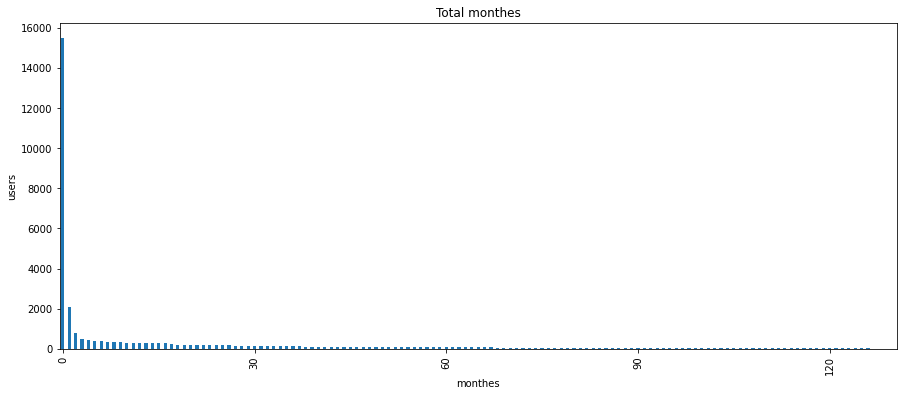

In [52]:
user['period'].value_counts().plot(kind = 'bar', figsize = (15,6))
plt.xticks(range(min(user['period']),max(user['period']),30),labels=[x for x in range(min(user['period']),max(user['period']),30)])
plt.xlabel('monthes')
plt.ylabel('users')
plt.title('Total monthes')

# 이상 유저에 대한 EDA

### timestamp가 하루 이하인 user

In [31]:
day1_user=list()
for i in range(len(user)):
    if user.loc[i,'period_year']==0 and user.loc[i,'period_month']==0 and user.loc[i,'period_day']==0:
        day1_user.append(user.loc[i,'user'])

print(len(day1_user))

10097


In [32]:
pd.DataFrame(day1_user).to_csv("eda_day1_user.csv",header=False, index=False)

# Bad users

In [33]:
bad_user=pd.read_csv("bad_user_id03.csv").to_numpy().reshape(-1) # 다른 기준으로 거른 bad user 10000명 
bad_user

array([    60,     65,     72, ..., 138473, 138475, 138492])

In [34]:
cnt=0
for u in bad_user:
    if u in day1_user:
        cnt+=1
print('bad_user에 속하면서 로그 길이가 하루인 유저의 명수: ', cnt)

bad_user에 속하면서 로그 길이가 하루인 유저의 명수:  4531


In [35]:
bad_user_len=list()
for u in bad_user: # 2분 이하 소요
    x=train_df[train_df['user']==u]
    bad_user_len.append(len(x))
print('bad_user의 log sequence 길이의 평균',sum(bad_user_len)/len(bad_user))

bad_user의 log sequence 길이의 평균 114.88838374466506


In [36]:
print("sequence 길이 최대 : ",max(bad_user_len), '           sequence 길이 최소 : ',min(bad_user_len))

sequence 길이 최대 :  1571            sequence 길이 최소 :  16


(array([3.000e+00, 5.180e+02, 2.462e+03, 1.718e+03, 1.255e+03, 1.035e+03,
        7.160e+02, 5.640e+02, 4.290e+02, 3.670e+02, 2.920e+02, 2.250e+02,
        1.840e+02, 1.710e+02, 1.420e+02, 1.070e+02, 9.600e+01, 7.500e+01,
        6.100e+01, 3.500e+01, 3.900e+01, 3.800e+01, 2.000e+01, 3.000e+01,
        1.800e+01, 1.600e+01, 1.900e+01, 1.400e+01, 1.300e+01, 1.300e+01,
        1.400e+01, 7.000e+00, 1.000e+01, 6.000e+00, 8.000e+00, 4.000e+00,
        5.000e+00, 5.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

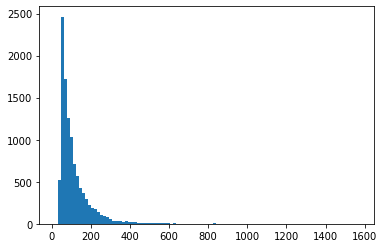

In [37]:
plt.hist(bad_user_len, bins=100)

### bad_user 중 이용기간이 하루 이상인 사람들

In [78]:
bad_morethan1day=list()
for u in bad_user:
    if u not in day1_user:
        bad_morethan1day.append(u)

print("bad user 중 timestamp기간이 하루보다 긴 users : " ,len(bad_morethan1day))
bad_morethan1day[:6]

bad user 중 timestamp기간이 하루보다 긴 users :  6247


[65, 82, 121, 136, 154, 189]

In [79]:
bad_morethan1day_len=list()
for u in bad_morethan1day:
    x=train_df[train_df['user']==u]
    bad_morethan1day_len.append(len(x))
print('bad_user의 log sequence의 평균',sum(bad_morethan1day_len)/len(bad_morethan1day_len))

bad_user의 log sequence의 평균 134.49719865535457


In [80]:
print("sequence 길이 최대 : ",max(bad_morethan1day_len), '           sequence 길이 최소 : ',min(bad_morethan1day_len))

sequence 길이 최대 :  1571            sequence 길이 최소 :  28


(array([ 12., 977., 909., 695., 662., 490., 414., 302., 285., 245., 189.,
        152., 139., 135.,  91.,  83.,  71.,  50.,  36.,  38.,  31.,  29.,
         17.,  24.,  14.,  19.,   8.,  16.,  10.,  12.,  12.,   6.,   8.,
          8.,   4.,   5.,   5.,   3.,   3.,   5.,   0.,   3.,   1.,   3.,
          0.,   0.,   0.,   2.,   3.,   0.,   0.,   2.,   3.,   0.,   0.,
          2.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,
          2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  28.  ,   43.43,   58.86,   74.29,   89.72,  105.15,  120.58,
         136.01,  151.44,  166.87,  182.3 ,  197.73,  213.16,  228.59,
         244.02,  259.45,  274.88,  290.31,  305.74,  321.17,  336.6 ,
         352.03,  367.46,  382.89,  398.32,  413.75,  429.18,  444.61,
         460.04,  475.47,  490.9 ,

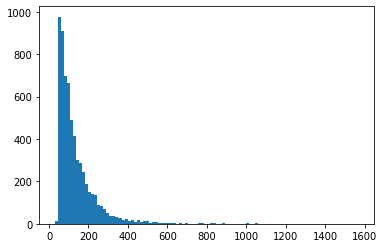

In [81]:
plt.hist(bad_morethan1day_len, bins=100)

#### 하루보다 오래 사용한 유저들의 평균 사용 개월 수

In [82]:
user

,user,period_year,period_month,period_day,period
0,11,2,0,11,24
1,14,0,0,0,0
2,18,3,10,-18,46
3,25,0,0,0,0
4,31,0,0,1,0
...,...,...,...,...,...
31355,138473,0,0,0,0
31356,138475,0,1,-13,1
31357,138486,0,0,0,0
31358,138492,0,0,1,0


In [83]:
user=pd.DataFrame(user)
user.head()

,user,period_year,period_month,period_day,period
0,11,2,0,11,24
1,14,0,0,0,0
2,18,3,10,-18,46
3,25,0,0,0,0
4,31,0,0,1,0


In [84]:
isin_1day=user['user'].isin(bad_morethan1day)
isin_1day_index=[i for i,x in enumerate(isin_1day) if x==True]
print(isin_1day_index[:5])
df_period_1day=user.iloc[isin_1day_index[:5],:]
df_period_1day

# country_list = ['한국', '일본', '대만', '영국', '호주']
# df[~df['country'].isin(country_list)]

# df_period_1day=abs(df_period_1day) # -값인 기간을 양수로 바꾸어줌
# df_period_1day.head()

[11, 14, 23, 29, 32]


,user,period_year,period_month,period_day,period
11,65,0,1,-16,1
14,82,4,11,-11,59
23,121,0,1,-21,1
29,136,0,1,-17,1
32,154,1,5,-7,17


In [85]:
df_period_1day.mean(axis=0)

user            111.6
period_year       1.0
period_month      3.8
period_day      -14.4
period           15.8
dtype: float64

평균 15개월 정도 사용기간을 가짐